<a href="https://colab.research.google.com/github/suraj-07-coder/calculus/blob/main/linear_regression_for_functions_of_1_variable_and_exponential_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**
This form of analysis estimates the coefficients of the linear equation and one oe more independent variables.

Consider a simple linear regression model :
$$y_{i} = m \cdot x_{i} + c + ϵ_{i}$$

 The terms c and m are the parameters of the model. The parameter c is termed as an intercept
term, and the parameter m is termed as the slope parameter. These parameters are usually called as
regression coefficients. The unobservable error component ϵ accounts for the failure of data to lie on a
straight line and represents the difference between the true and observed realization of y

Expression for Summation of Error is as follows:$$SE = \sum_{i=1}^{n}(y_{i} - m \cdot x_{i} - c)^2$$ Now find the partial derivative with respect to m and c  :
$$\frac{∂SE}{∂m} = 0  \quad  and \quad \frac{∂SE}{∂c} = 0$$
After solving the obove equation we have $m$ and $c$ as following :
$$m =\frac{\overline{xy} - \overline{x}⋅\overline{y}}{\overline{x^2} - (\overline{x})^2} \quad \quad and \quad \quad c = \overline{y} - m \cdot \overline{x}$$ Where  $$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}  \quad \quad and \quad \quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i} $$

In [ ]:
import random
import math
import numpy as np

In [ ]:
m = float(input('Enter orbitary value for m : '))
c = float(input('Enter orbitary value for c : '))
# NOTE : You  can experiment with the different value of a for reasonable Graph
n = int(input("Enter the total number of experiment: "))
alpha = float(input('Enter orbitary value for alpha(a) : '))

Enter orbitary value for m : 4
Enter orbitary value for c : 2
Enter the total number of experiment: 100
Enter orbitary value for alpha(a) : 50


In [ ]:
# m = 4
# c = 2
# n = 100
# alpha = 50

# Generate a list of n x values using a list comprehension
x_lst = [i for i in range(n)]

# Create an empty list to hold the corresponding y values
y_lst = []

# For each x value, generate a corresponding y value with some random error added to it
for i in range(n):
  # Randomise the error using a uniform distribution centered at 0 with a range of [-0.5*alpha, 0.5*alpha]
  Ei = (random.random()-0.5)*alpha
  
  # Calculate the y value for this x value, using the equation of a line y = mx + c, and adding the random error
  y1 = m*x_lst[i] + c + Ei
  
  # Append the y value to the list of y values
  y_lst.append(y1)


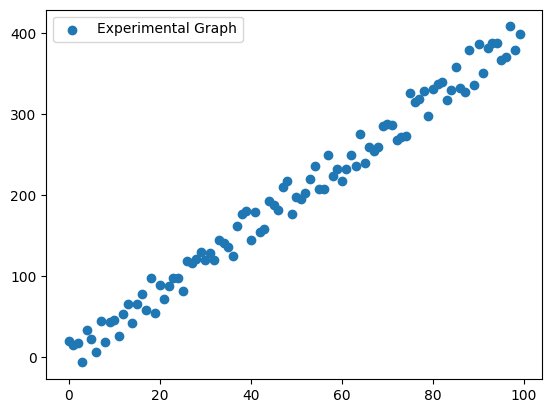

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_lst, y_lst, label = 'Experimental Graph')
plt.legend()
plt.show()

In [ ]:
# Initialize some variables that will be used to calculate the slope and intercept of the line of best fit
xy = 0
y = 0
x = 0
x2 = 0

# Loop through each of the x and y values, accumulating the necessary sums for the slope and intercept calculations
for i in range(n):
    y += y_lst[i]             # Sum of y values
    x += x_lst[i]             # Sum of x values
    x2 += x_lst[i] ** 2       # Sum of squared x values
    xy += x_lst[i] * y_lst[i] # Sum of x_i * y_i
    
# Calculate the mean values of x, y, and x^2
xy_bar = xy / n
x_bar = x / n
y_bar = y / n
x2_bar = x2 / n

# Calculate the slope (m) and y-intercept (c)
cal_m = (xy_bar - x_bar * y_bar) / (x2_bar - x_bar**2)
cal_c = y_bar - m * x_bar


In [ ]:
# Create an empty list to hold the y values predicted by the line of best fit
y_analytical = []

# For each x value, use the slope and y-intercept calculated previously to predict the corresponding y value
for i in range(n):
  # Calculate the y value for this x value using the equation of the line y = mx + c
  y1 = cal_m * x_lst[i]  +  cal_c
  
  # Append the predicted y value to the list of y values predicted by the line of best fit
  y_analytical.append(y1)


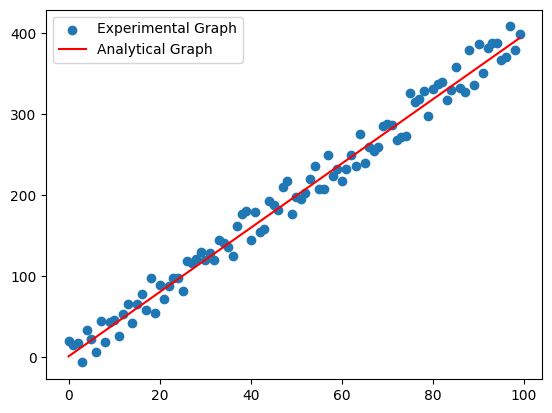

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_lst, y_lst, label = 'Experimental Graph')
plt.plot(x_lst, y_analytical, label = 'Analytical Graph', color = 'red')
plt.legend()
plt.show()


$$!! \quad LINEAR \quad REGRESSION \quad FOR \quad EXPONENTIAL \quad EQUATION \quad !!$$
$$y_{i} = β\cdot e^{γx_{i} + ϵ_{i}}$$
To solve this by linear regression first of all convert it into linear equation by taking log on both side:$$\log{y_{i}} =  \log{β} + γ\cdot x_{i} + ϵ_{i}$$consider  $ \quad y_{i}^{new}= \log{y_{i}}, \quad c = \log{β} \quad and \quad m = γ$

with this new terms apply linear regression method to find $β$ and $γ$.

In [ ]:
gama = float(input("enter value of gama: "))
beta = float(input("enter value of beta: "))

enter value of gama: 0.05
enter value of beta: 2


In [ ]:
y_experimental_list = []
alpha = 0.1
gama = 0.1
beta = 0.1
for i in range(n):
    # randomising error
    E1 = (random.random()-0.5)*alpha
    # obtaining experimental ouput for input
    yi = beta*math.exp(gama*x_lst[i] + E1)
    y_experimental_list.append(yi)

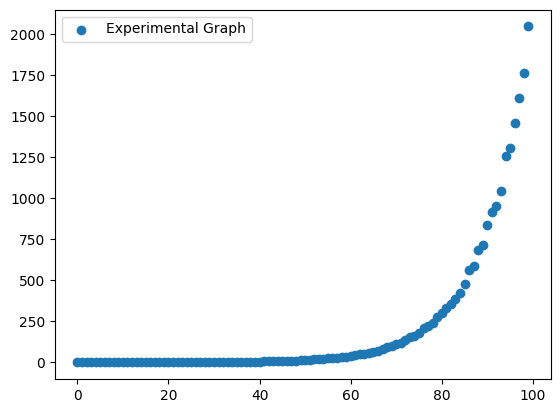

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_lst, y_experimental_list, label = 'Experimental Graph')
plt.legend()
plt.show()

In [ ]:
# Initialize some variables to be used in calculating the correlation coefficient between x and log(y)
z = []      # List to hold log(y) values
z_acc = 0   # Accumulator for sum of log(y) values
xz_acc = 0  # Accumulator for sum of x_i * log(y_i) values

# Loop through each of the x and y values, computing the log(y) values and accumulating the necessary sums for the correlation coefficient calculation
for i in range(n):
    z1 = math.log(y_experimental_list[i])  # Compute log(y_i)
    z.append(z1)                           # Append log(y_i) to list of log(y) values
    z_acc += z[i]                         # Sum log(y) values
    xz_acc += x_lst[i] * z[i]             # Sum x_i * log(y_i)

# Calculate the mean values of log(y) and x * log(y)
z_bar = z_acc/n
xz_bar = xz_acc/n


In [ ]:
gama_new = (xz_bar - x_bar*z_bar)/(x2_bar-x_bar**2)

In [ ]:
log_beta = z_bar - gama_new * x_bar
beta_new = math.exp(log_beta)

In [ ]:
# Create an empty list to hold the predicted y values based on the new model
y_exp_list = []

# For each x value, use the new parameters to predict the corresponding y value
for i in range(n):
  # Calculate the y value for this x value using the new model y = beta * exp(gamma * x)
  yi = beta_new * math.exp(gama_new * x_lst[i])
  
  # Append the predicted y value to the list of y values predicted by the new model
  y_exp_list.append(yi)


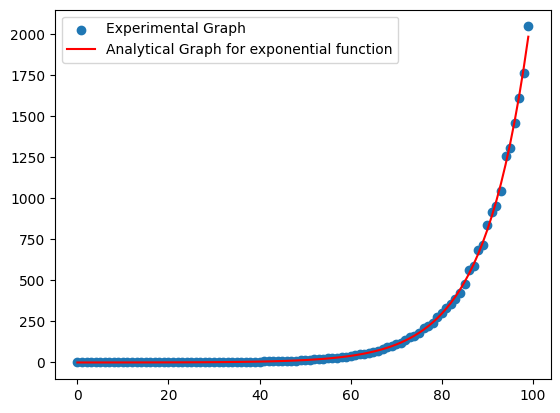

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_lst, y_experimental_list, label = 'Experimental Graph')
plt.plot(x_lst, y_exp_list, label = 'Analytical Graph for exponential function' , color = 'red')
plt.legend()
plt.show()